In [27]:
import pandas as pd
import matplotlib.pyplot as mp, seaborn
import numpy as np
import scipy.stats.stats as stats
import math

In [16]:
df = pd.read_csv('109 psy_testing hw2.txt', sep=" ")

A向度內相關係數


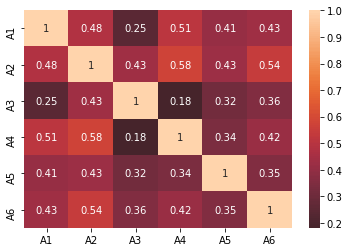

B向度內相關係數


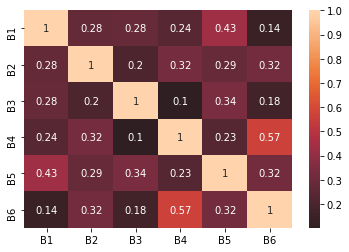

C向度內相關係數


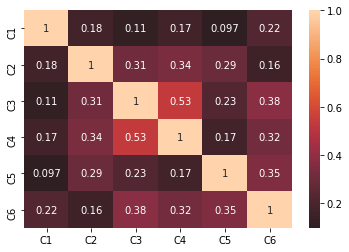

D向度內相關係數


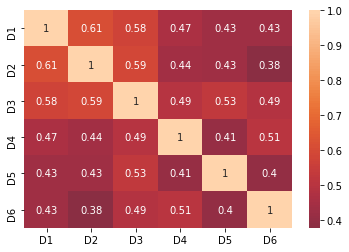

四個向度總分相關係數


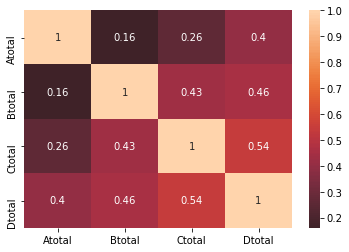

In [18]:
#1.a - 內部相關係數矩陣圖
type_list = ['A','B','C','D']

#向度內相關係數
for i in type_list:
    new_df = df[[f'{i}1',f'{i}2',f'{i}3',f'{i}4',f'{i}5',f'{i}6']]#整理出各向度題目
    new_df_corr = new_df.corr()
    print(f'{i}向度內相關係數')
    seaborn.heatmap(new_df_corr, center=0, annot=True)#劃出圖來
    mp.show()
    

#各向度總分相關係數，將A-D總分分別加起來
for i in type_list:
    df[f'{i}total'] = df[f'{i}1'] + df[f'{i}2'] + df[f'{i}3'] + df[f'{i}4'] + df[f'{i}5'] + df[f'{i}6']

new_df = df[['Atotal','Btotal','Ctotal','Dtotal']]#把四個向度總分欄位獨立出來
new_df_corr = new_df.corr()#跑相關係數
print('四個向度總分相關係數')
seaborn.heatmap(new_df_corr, center=0, annot=True)#劃出圖來

mp.show()

In [54]:
#1.b - 內部一致性信度

#個別向度內部一致性信度
for i in type_list:
    df2 = df[[f'{i}1',f'{i}2',f'{i}3',f'{i}4',f'{i}5',f'{i}6']]#抽出來個別向度內之題目
    total_row = df2.sum(axis=1)#以下為計算公式
    sy = total_row.var()
    var_column =  df2.var()
    si = var_column.sum()
    r = (6/5)*((sy-si)/sy)
    print(f'{i}向度內部一致性信度為 %.2f'%(r))
    

#整份量表內部一致性信度
df3 = pd.read_csv('109 psy_testing hw2.txt', sep=" ")#重開一份新表格
df3 = df3.drop(['ID'],axis=1)
total_row = df3.sum(axis=1)#以下為計算公式
sy = total_row.var()
var_column =  df3.var()
si = var_column.sum()
r = (24/23)*((sy-si)/sy)
print(f'整份量表內部一致性信度為 %.2f'%(r))

A向度內部一致性信度為 0.80
B向度內部一致性信度為 0.70
C向度內部一致性信度為 0.68
D向度內部一致性信度為 0.84
整份量表內部一致性信度為 0.87


In [50]:
#2.a
df3['odd'] = df['A1'] + df['A3'] + df['A5'] +df['B1'] + df['B3'] + df['B5'] + df['C1'] + df['C3'] + df['C5'] + df['D1'] + df['D3'] + df['D5']
df3['even'] = df['A2'] + df['A4'] + df['A6'] +df['B2'] + df['B4'] + df['B6'] + df['C2'] + df['C4'] + df['C6'] + df['D2'] + df['D4'] + df['D6']
new_df = df3[['odd','even']]#整理出奇數題偶數題

#計算spearman
original_corr = new_df.corr()['odd']['even']#計算原始相關係數
spearman_correct = (2*original_corr)/(1+original_corr)#spearman校正公式
print('Spearman Brown Formula : %.2f'%(spearman_correct))

#計算Rulon
df3['odd-even'] = df3['odd'] - df3['even']#創建奇偶差異欄位
df4 = pd.read_csv('109 psy_testing hw2.txt', sep=" ")#重新設全新的完整資料
df4 = df4.drop(['ID'],axis=1)
rulon = 1-(df3['odd-even'].var()/df4.sum(axis=1).var())#計算公式
print("Rulon's approach : %.2f"%(rulon))

Spearman Brown Formula : 0.87
Rulon's approach : 0.87


In [60]:
#2.b

#以整份量表之alpha係數作為信度指標，並利用Spearman-Brown formula做出之內部一致性信度
n = (8/24)#算n
eight_spearman_correct = (n*r)/(1+(n-1)*r)#計算公式
print('以整份量表之alpha係數作為信度指標，並利用Spearman-Brown formula做出之內部一致性信度為%.2f'%(eight_spearman_correct))

#取各向度前兩題作為8題短版的快篩量表，計算所得之短版α係數
df_head_two = df4[['A1','A2','B1','B2','C1','C2','D1','D2']]
total_row = df_head_two.sum(axis=1)#以下為計算公式
sy = total_row.var()
var_column =  df_head_two.var()
si = var_column.sum()
head_two_r = (8/7)*((sy-si)/sy)
print('取各向度前兩題作為8題短版的快篩量表，計算所得之短版α係數為%.2f'%(head_two_r))

以整份量表之alpha係數作為信度指標，並利用Spearman-Brown formula做出之內部一致性信度為0.68
取各向度前兩題作為8題短版的快篩量表，計算所得之短版α係數為0.72


In [78]:
#5.
#算SEM
SEM = (df3.sum(axis=1).std())*((1-r)**0.5)#SEM計算公式
print('SEM為%.2f'%(SEM))

#算P_001之95%信賴區間
P_001 = df3.sum(axis=1)[0]#找出001之總分
upper = P_001 + (1.96*SEM)#上界
lower = P_001 - (1.96*SEM)#下界
print('P_001之95信賴區間為[%.2f , %.2f]'%(lower,upper))

SEM為4.13
P_001之95信賴區間為[39.90 , 56.10]


In [31]:
print('B1之平均為{}'.format(np.mean(new_df['B1'])))
print('B1之標準差為{}'.format(np.std(new_df['B1'])))
print('B1之偏態為{}'.format(pd.Series(new_df['B1']).skew()))
print('B1之峰度為{}'.format(pd.Series(new_df['B1']).kurt()))

B1之平均為3.526530612244898
B1之標準差為0.887733989896744
B1之偏態為-0.4681351526227043
B1之峰度為0.135467199934999


In [33]:
for i in range(1,10):
    print('B{}之平均為{}'.format(i,np.mean(new_df['B{}'.format(i)])))
    print('B{}之標準差為{}'.format(i,np.std(new_df['B{}'.format(i)])))
    print('B{}之偏態為{}'.format(i,pd.Series(new_df['B{}'.format(i)]).skew()))
    print('B{}之峰度為{}'.format(i,pd.Series(new_df['B{}'.format(i)]).kurt()))
    print('-----------------------------------------------------------')

B1之平均為3.526530612244898
B1之標準差為0.887733989896744
B1之偏態為-0.4681351526227043
B1之峰度為0.135467199934999
-----------------------------------------------------------
B2之平均為2.2857142857142856
B2之標準差為1.117577555177597
B2之偏態為0.6708222071410296
B2之峰度為-0.3507261373039485
-----------------------------------------------------------
B3之平均為2.3591836734693876
B3之標準差為1.1291894089859758
B3之偏態為0.6104881888132347
B3之峰度為-0.4680315308845544
-----------------------------------------------------------
B4之平均為3.5183673469387755
B4之標準差為1.1013300807155317
B4之偏態為-0.3604705730912575
B4之峰度為-0.6207687084236042
-----------------------------------------------------------
B5之平均為2.636734693877551
B5之標準差為0.9911226118162564
B5之偏態為0.35021350064935847
B5之峰度為-0.36551736937815216
-----------------------------------------------------------
B6之平均為3.963265306122449
B6之標準差為0.9095174494407192
B6之偏態為-0.8114201038975803
B6之峰度為0.3205292029775637
-----------------------------------------------------------
B7之平均為3.146938775510204
B7之標準差為

0.5821594091345692


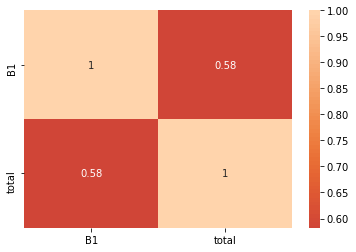

0.022792374521703962


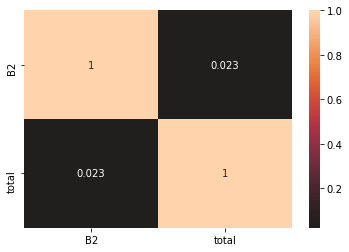

0.42734431131885126


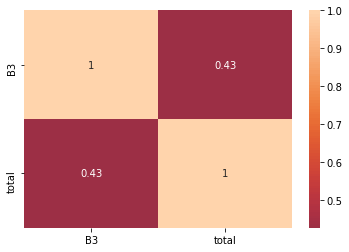

0.5053220410459662


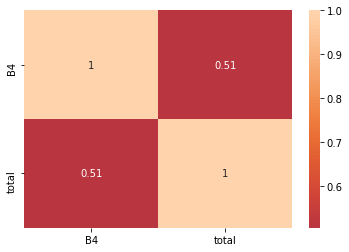

0.2924425392319808


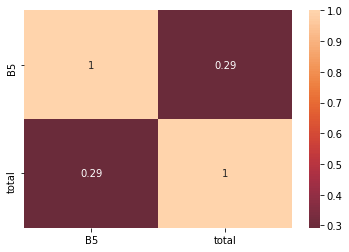

0.22167724378083556


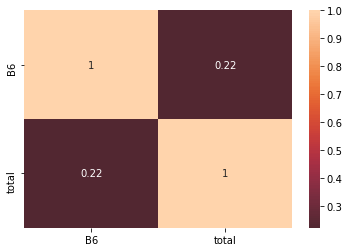

0.5115117760913234


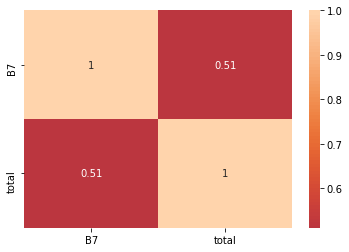

0.2083795252639961


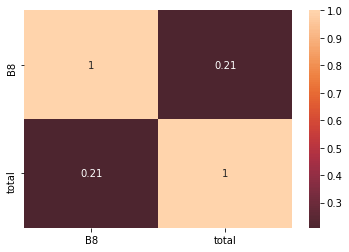

0.6374812248185524


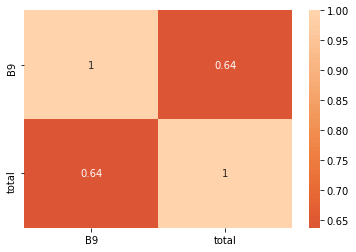

In [16]:
for i in range(1,10):
    second_new_df = df[['B{}'.format(i),'total']]
    new_sec_df_corr = second_new_df.corr()
    print(new_sec_df_corr['total']['B{}'.format(i)]*np.std(new_df['B1']))
    seaborn.heatmap(new_sec_df_corr, center=0, annot=True)
    mp.show()

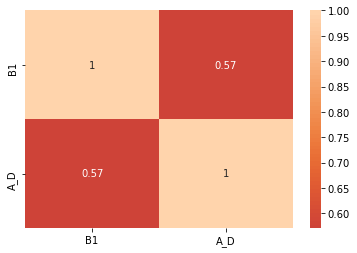

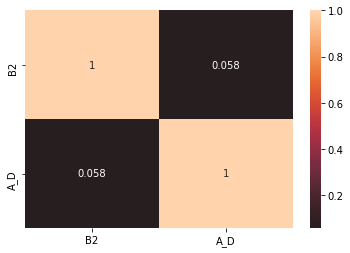

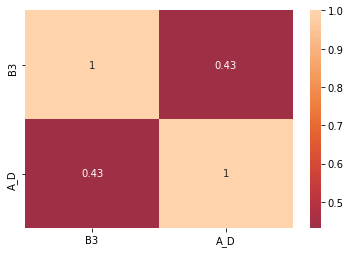

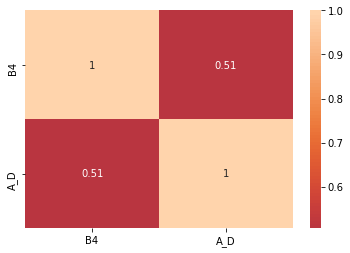

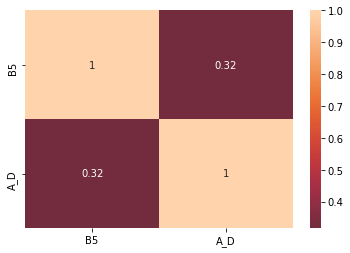

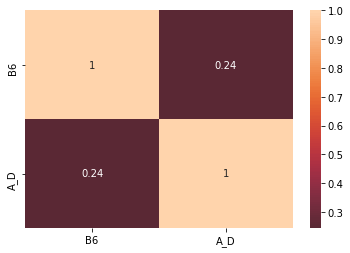

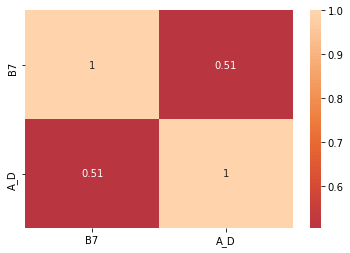

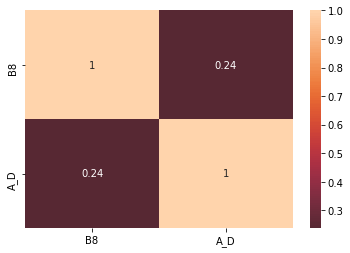

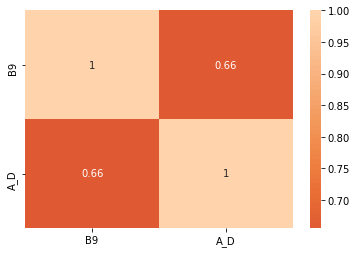

In [68]:
for i in range(1,10):
    second_new_df = df[['B{}'.format(i),'A_D']]
    new_sec_df_corr = second_new_df.corr()
    seaborn.heatmap(new_sec_df_corr, center=0, annot=True)

    mp.show()

In [69]:
df['B_total'] = df['B1'] + df['B2'] + df['B3'] + df['B4'] + df['B5'] + df['B6'] + df['B7'] + df['B8'] + df['B9']

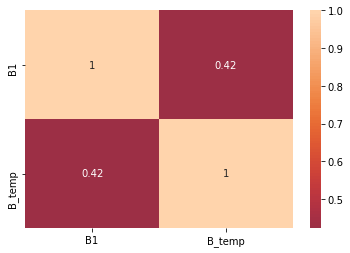

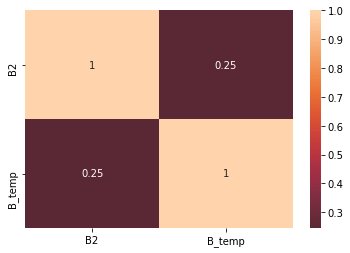

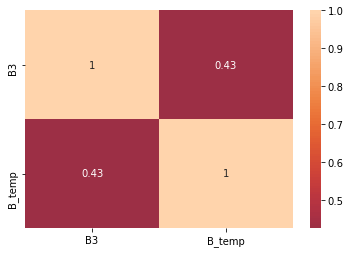

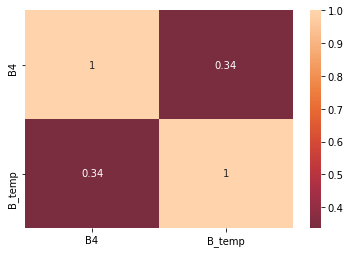

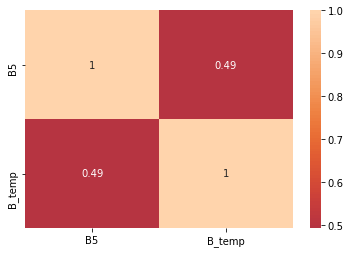

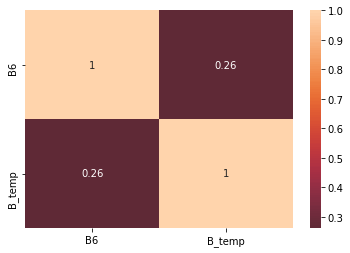

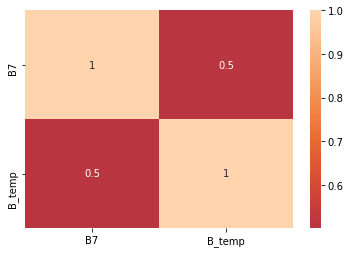

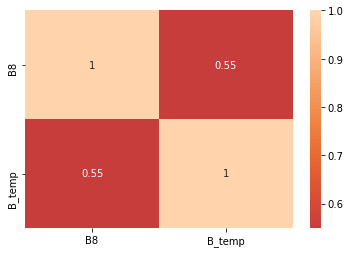

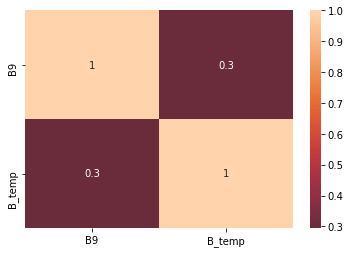

In [71]:
for i in range(1,10):
    df['B_temp'] = df['B_total'] - df['B{}'.format(i)]
    second_new_df = df[['B{}'.format(i),'B_temp']]
    new_sec_df_corr = second_new_df.corr()
    seaborn.heatmap(new_sec_df_corr, center=0, annot=True)

    mp.show()

In [21]:
dat1=[]
dat2=[]
for i in range(len(df)):
    dat1.append(df['B9'][i])
    dat1.append(df['B6'][i])
    dat1.append(df['B1'][i])
    dat2.append(df['B2'][i])
    dat2.append(df['B3'][i])
    dat2.append(df['B8'][i])
import scipy.stats
t,p = scipy.stats.ttest_ind(dat1, dat2, equal_var = True)
print('變異數相同之t值{}，p值{}'.format(t,p))

變異數相同之t值28.46844649645194，p值2.5799632207396972e-142


In [105]:
dat1=[]
dat2=[]
for i in range(len(df)):
    dat1.append(df['B9'][i])
    dat1.append(df['B6'][i])
    dat1.append(df['B1'][i])
    dat2.append(df['B2'][i])
    dat2.append(df['B3'][i])
    dat2.append(df['B8'][i])
import scipy.stats
t,p = scipy.stats.ttest_ind(dat1, dat2, equal_var = False)
print('變異數不同之t值{}，p值{}'.format(t,p))

變異數不同之t值28.468446496451936，p值4.306778870522303e-141


In [100]:
import scipy.stats.stats as stats
import math
df2 = pd.read_csv('109 psy_testing hw1.txt', sep=" ")
df2 = df2[['B1','B2','B3','B4','B5','B6','B7','B8','B9']]
total_row = df2.sum(axis=1)
#print total_row
sy = total_row.var()
var_column =  df2.var()
si = var_column.sum()
r = (9/8)*((sy-si)/sy)
print('B向度內部一致性信度為{}'.format(r))

B向度內部一致性信度為0.7156080862379082


In [92]:
for i in range(1,10):
    df_6 = df2[['B1','B2','B3','B4','B5','B6','B7','B8','B9']]
    df_6 = df_6.drop(['B{}'.format(i)], axis=1)
    total_row = df_6.sum(axis=1)
    #print total_row
    sy = total_row.var() 
    var_column =  df_6.var()
    si = var_column.sum() 
    r = (8/7)*((sy-si)/sy)
    print('去除B{}後B向度之內部一致性信度為{}'.format(i,r))

去除B1後B向度之內部一致性信度為0.685704871579433
去除B2後B向度之內部一致性信度為0.7206274214755025
去除B3後B向度之內部一致性信度為0.6836248628640158
去除B4後B向度之內部一致性信度為0.7020497400520135
去除B5後B向度之內部一致性信度為0.6714391149784058
去除B6後B向度之內部一致性信度為0.7120707280171138
去除B7後B向度之內部一致性信度為0.670137211774689
去除B8後B向度之內部一致性信度為0.6591533519453047
去除B9後B向度之內部一致性信度為0.7063612645995629


In [93]:
df['E_total'] = df['E1'] + df['E2'] + df['E3'] + df['E4'] + df['E5'] + df['E6']

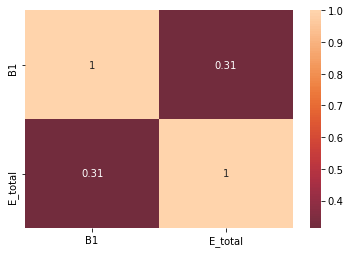

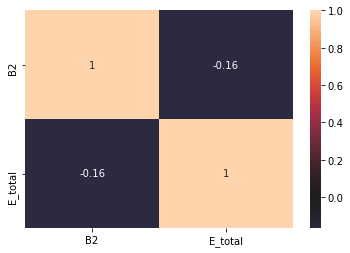

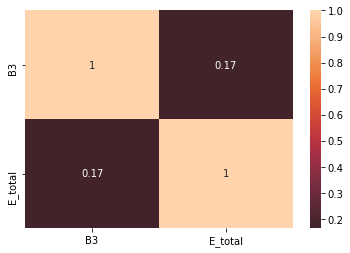

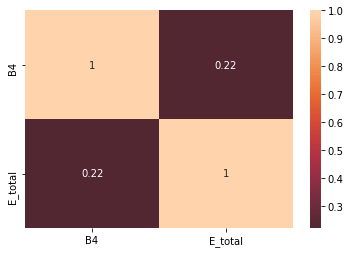

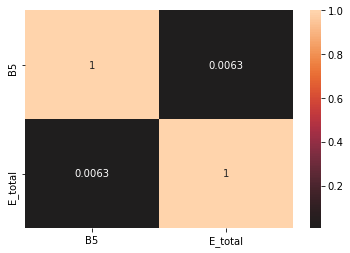

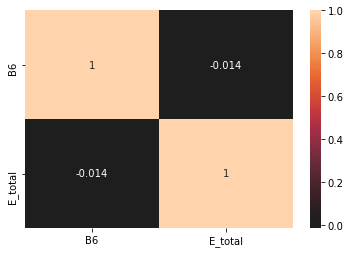

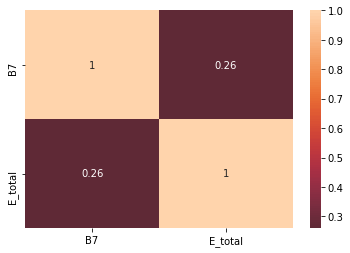

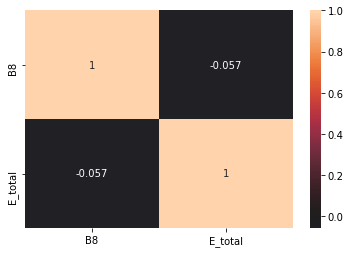

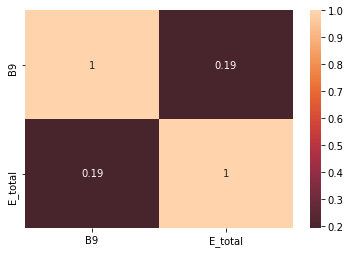

In [95]:
for i in range(1,10):
    second_new_df = df[['B{}'.format(i),'E_total']]
    new_sec_df_corr = second_new_df.corr()
    seaborn.heatmap(new_sec_df_corr, center=0, annot=True)

    mp.show()

In [18]:
for i in range(1,10):
    second_new_df = df[['B{}'.format(i),'total']]
    new_sec_df_corr = second_new_df.corr()
    print('B{}之題目信度為{}'.format(i,new_sec_df_corr['total']['B{}'.format(i)]*np.std(df['B1'])))

B1之題目信度為0.5168026950269621
B2之題目信度為0.02023356557337315
B3之題目信度為0.37936807054676014
B4之題目信度為0.44859155168050185
B5之題目信度為0.25961118216794143
B6之題目信度為0.19679042409087433
B7之題目信度為0.45408638986872046
B8之題目信度為0.18498558737539664
B9之題目信度為0.5659137511924368


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
dat = {'Score':dat3,'High_Low':dat4}
anova_df = pd.DataFrame(dat)
mod = ols('Score ~ High_Low', data = anova_df).fit()
dd = sm.stats.anova_lm(mod, typ = 2)

In [37]:
dat3=[]
dat4=[]
for i in range(len(df)):
    dat3.append(df['B9'][i])
    dat4.append('High')
    dat3.append(df['B6'][i])
    dat4.append('High')
    dat3.append(df['B1'][i])
    dat4.append('High')
    dat3.append(df['B2'][i])
    dat4.append('Low')
    dat3.append(df['B3'][i])
    dat4.append('Low')
    dat3.append(df['B8'][i])
    dat4.append('Low')

In [50]:
dd['ms'] = dd['sum_sq']/dd['df']

In [40]:
1455.929252/1468

0.9917774196185285

In [41]:
803.788435/0.9917774196185285

810.4524453774765

In [53]:
dd = dd[['sum_sq','df','ms','F','PR(>F)']]

In [54]:
dd

,sum_sq,df,ms,F,PR(>F)
High_Low,803.788435,1.0,803.788435,810.452446,2.579963e-142
Residual,1455.929252,1468.0,0.991777,NaN,NaN


In [55]:
dd.loc['Total'] = sum(dd.sum_sq)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
dd['df']['Total'] = 1469

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
dd['ms']['Total'] = 'NaN'
dd['F']['Total'] = 'NaN'
dd['PR(>F)']['Total'] = 'NaN'

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
print('平均差異分析表')
dd

平均差異分析表


,sum_sq,df,ms,F,PR(>F)
High_Low,803.788435,1.0,803.788435,810.452446,2.579963e-142
Residual,1455.929252,1468.0,0.991777,NaN,NaN
Total,2259.717687,1469.0,NaN,NaN,NaN


B1直方圖


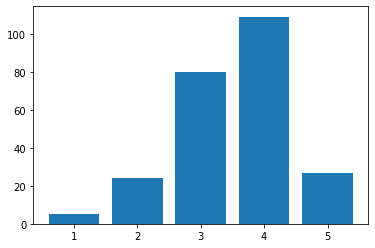

B2直方圖


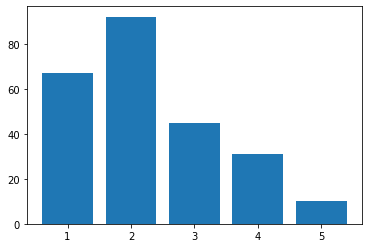

B3直方圖


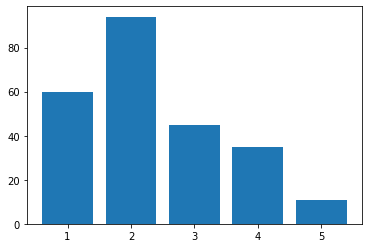

B4直方圖


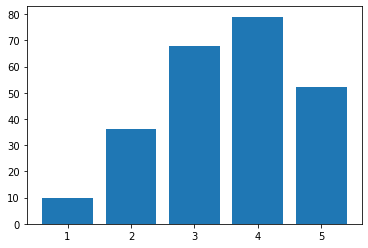

B5直方圖


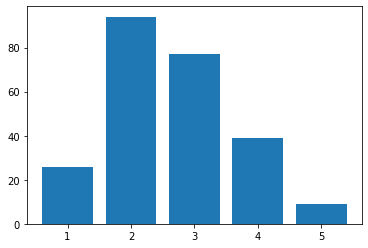

B6直方圖


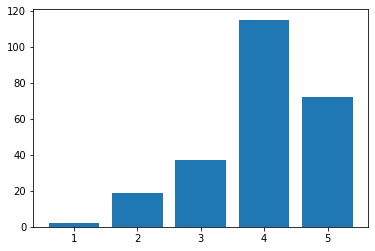

B7直方圖


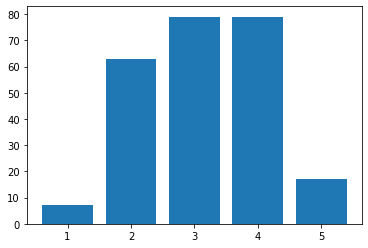

B8直方圖


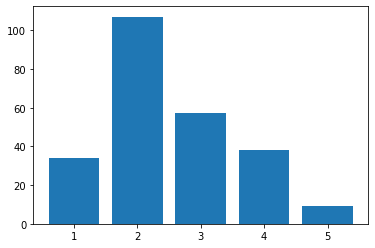

B9直方圖


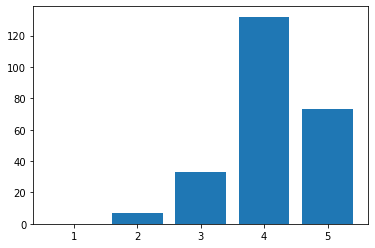

In [88]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
x = ['1','2','3','4','5']
for i in range(1,10):
    #new_ticks = np.linspace(1, 5, 5)
    #plt.xticks(new_ticks)
    #plt.axis([1, 5, 0, len(df['B{}'.format(i)])],'tight')
    count={'1':0,'2':0,'3':0,'4':0,'5':0}
    for j in df['B{}'.format(i)]:
        if j == 1:
            count['1'] += 1
        elif j ==2:
            count['2'] += 1
        elif j ==3:
            count['3'] += 1
        elif j ==4:
            count['4'] += 1
        elif j ==5:
            count['5'] += 1
    y = []
    for ind in x:
        y.append(count[ind])
    
    plt.bar(x,y,align='center')
    print('B{}直方圖'.format(i))
    plt.show()
   